In [2]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [6]:
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print(df_can.shape)

(195, 38)


In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [8]:
df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


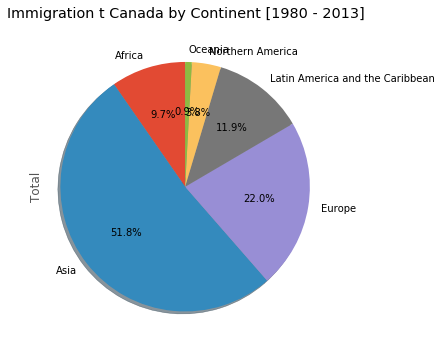

In [9]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct ='%1.1f%%',
                           startangle =90,
                           shadow=True,
                           )
plt.title('Immigration t Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.show()

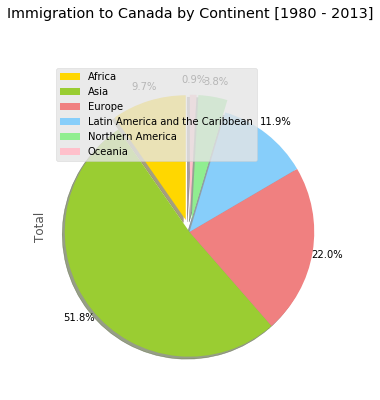

In [10]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list=[0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct ='%1.1f%%',
                           startangle =90,
                           shadow=True,
                           labels =None,
                           pctdistance=1.12,
                            colors = colors_list,
                            explode = explode_list,
                           )
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

In [11]:
df_japan = df_can.loc[['Japan'], years].transpose()

df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


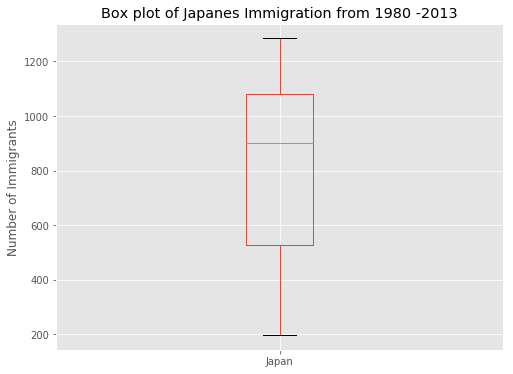

In [12]:
df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanes Immigration from 1980 -2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [13]:
df_CI = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)
df_CI = df_CI.transpose()
df_CI.head()


,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
Type,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,...,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants
Coverage,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,...,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners
OdName,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
AREA,935,908,903,909,908,903,904,904,935,909,...,905,904,935,909,904,935,903,935,903,903
AreaName,Asia,Europe,Africa,Oceania,Europe,Africa,Latin America and the Caribbean,Latin America and the Caribbean,Asia,Oceania,...,Northern America,Latin America and the Caribbean,Asia,Oceania,Latin America and the Caribbean,Asia,Africa,Asia,Africa,Africa


In [14]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


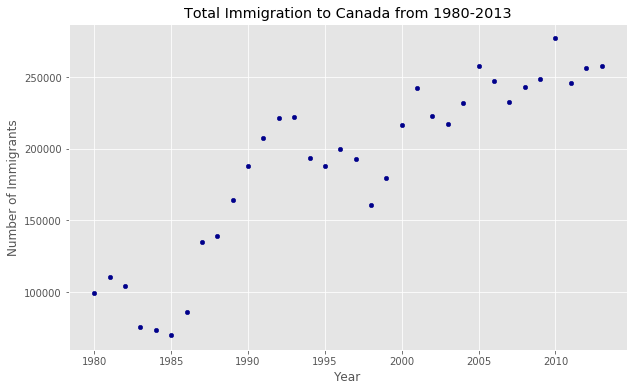

In [15]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [16]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

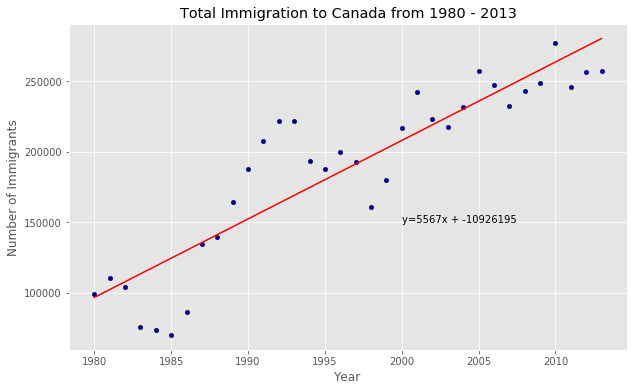

'No of Immigrants = 5567*Year + 5567'

In [18]:
df_tot.plot(kind = 'scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0]*x + fit[1], color='red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

'No of Immigrants = {0:.0f}*Year + {0:.0f}'.format(fit[0], fit[1])

In [21]:
df_can_t = df_can[years].transpose()

df_can_t.index =map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [23]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

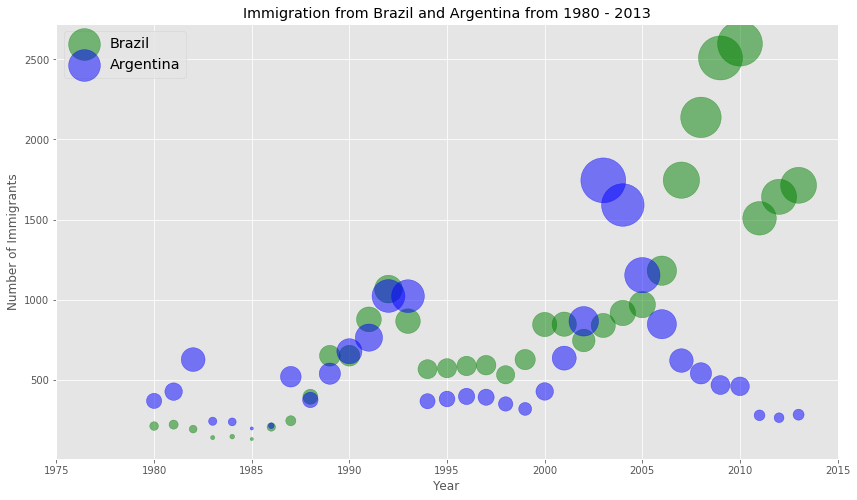

In [25]:
ax0 = df_can_t.plot(kind='scatter', x='Year', y='Brazil',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='green',
                   s=norm_brazil*2000 +10,
                   xlim = (1975, 2015)
                   )
ax1 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Argentina',
                   alpha=0.5,
                   color='blue',
                   s=norm_argentina * 2000 + 10,
                   ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc = 'upper left', fontsize='x-large')
